<h1 align="center">Regression</h1>



In the context of supervised learning, regression refers to the type of problem that tries to predict the results in a continuous output, which means an attempt to map input variables to some continuous function.

##**Regularization**


Machine Learning models sometimes cause problems because it fits the data too well, therefore the model won't generalize well with real world data. 

A way to fix that issue is to use Regularization. There are a lot of ways to do Regularization, but in this notebook we will talk about the ridge regularization and lasso (Least Absolute Shrinkage and Selection Operator) regularization. 

But to understand better theses kinds of Regularization, we need to learn about Norms.




## **Norms**

Norm is a way to measure the distance between two vectors. Usually, it's used to measure the distance between a vector and the origin. To our goals, we will use L1 and L2 norm.



## **L1  Norm or Mean Absolute Error**

  The L1 norm is addition of the numbers inside a vector. 

  So, Consider a vector x = [B1 B2], using the L1 norm we will have:

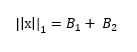

  Mathematically, L1 Norm is denoted by the following equation:

  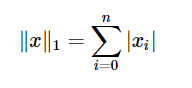

## **L2 Norm or Root Mean Squared Error** 

In L2 Norm or Root Mean Squared Error, instead of sum the values, we take the addition of the suqares of all the numbers and then we take its square root.

For exemple, Consider a vector x = [B0 B1], using the L2 norm we will have:

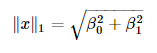

Mathematically, L2 Norm is denoted by the following equation:

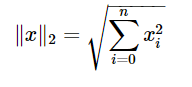

## **Ridge Regularization**

Ridge regression or Tikhonov regularization is the regularization technique that performs L2 regularization, so it modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the square of the magnitude of coefficients ω.

The complexity parameter α ≥ 0, controls the shrinkage: the larger the value of α, better the coefficientes becomes to deal with collinearity, because the amount of shrinkage increases. The α works the same way that λ.

Here we have a graph that shows the effect of collinearity in the coefficients of an estimator. In this case, the Ridge Regression is the estimator used.

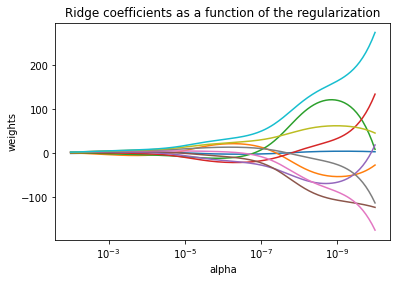

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

The Ridge method will store the coefficientes ω of the linear model in its coef_ member, and the arrays X, y in its fit method:

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
reg.coef_

array([0.34545455, 0.34545455])

The Ridge Regressor presents a classifier variant: **RidgeClassifier**. It first convert binary targets to {-1, 1} and then treats the problem as a regression task. The predicted class corresponds to the sign of the regressor’s prediction. In the example below, we use the classifier in the breast cancer wisconsin dataset (classification).



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifier().fit(X, y) #Fit Ridge classifier model.
clf.score(X, y) # Return the mean accuracy on the given test data and labels.

0.9595782073813708

## **Lasso (Least Absolute Shrinkage and Selection Operator) Regularization**

In lasso Regularization, we use the L1 regularization instead of the L2 regularization. It is less used than the Ridge Regularization, but it's really useful in somenareas like the compressed sensing, due to preference to solutions with fewer non-zero coefficientes, which makes the number of features that the solution is dependent fall.

The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients.


In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
reg.predict([[1, 1]])

array([0.8])

The alpha parameter controls the degree of sparsity of the estimated coefficients.

In [ ]:
from sklearn import linear_model
reg1 = linear_model.Lasso(alpha=0.1)
reg1.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
reg1.predict([[1, 1]])

array([0.8])

In [ ]:
from sklearn import linear_model
reg2 = linear_model.Lasso(alpha=0.3)
reg2.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
reg.predict([[1, 1]])

array([0.8])

##**Differences between both regularization**

In order to sumurize, rigde regression and lasso regression increase bias to the line made in the training set in order to provide a better fit for the next values, allowing us to have better long term predictions, but in lasso, instead of squaring the terms in the penalty, we take the absolute value of them.

Besides that, as we think about the slope, in rigde regression it can shrink asymptotically close to 0, and in lasso regression it can shrink all the way to zero. **This is the biggest difference between them.**

By doing so, lasso regression tend to exclude useless variables from equations, helping to reduce the variance in models that contain a lot of useless variables, and rigde regression tends to be better when most of the variables are useful.

## **Tips**

If you want to know more Ridge in scikit, click [here.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)

If you want to know more about how to use Lasso in scikit, click [here.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

To see learn about Lasso and Ridget Regularization, click [here.](https://medium.com/all-about-ml/lasso-and-ridge-regularization-a0df473386d5)